In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
monthly_data = pd.read_csv('monthly_data.csv')
weekly_data = pd.read_csv('weekly_data.csv')
hourly_data = pd.read_csv('hourly_data.csv')

In [3]:
# Monthly data processing
monthly_sum = monthly_data['value_month'].sum()
monthly_data['relative_values'] = monthly_data['value_month']*10000/monthly_sum #scale 10000 to avoid negligible value
weekly_data['year'] = pd.to_datetime(weekly_data['date']).dt.year
weekly_data['month'] = pd.to_datetime(weekly_data['date']).dt.month

In [4]:
# Weekly data processing
relative_values = []
for i, row in monthly_data.iterrows():
    year = pd.to_datetime(row['date']).year
    month = pd.to_datetime(row['date']).month
    df = weekly_data[(weekly_data['year']==year) & (weekly_data['month']==month)]
    total = df['value_week'].sum()
    num = row['relative_values']
    relative_values += [num*x/total for x in list(df['value_week'])]

weekly_data['relative_values'] = relative_values

In [5]:
# Hourly data processing
relative_values = []
for i, row in weekly_data.iterrows():
    start = pd.to_datetime(row['date'])
    end = start + pd.DateOffset(7)
    df = hourly_data[(pd.to_datetime(hourly_data['date'])>=start) & (pd.to_datetime(hourly_data['date'])<end)]
    total = df['value_hour'].sum()
    num = row['relative_values']
    relative_values += [num*x/total for x in list(df['value_hour'])]

hourly_data['relative_values'] = relative_values

# If we want to further scale all the data between 0-1 or 0-100 we can simpliy divide the data by the maximum value and multiply by the scale we want.

Text(0.5, 1.0, 'monthly_data')

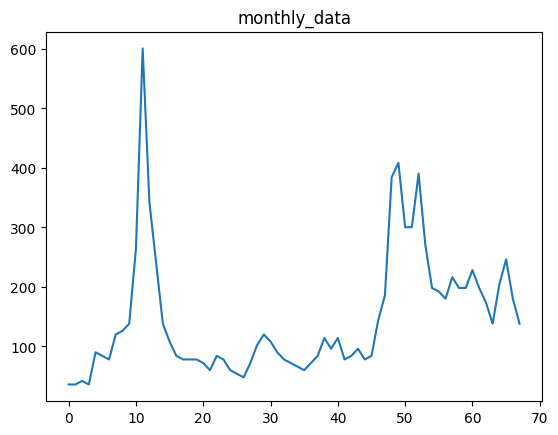

In [6]:
plt.plot(monthly_data['relative_values'])
plt.title('monthly_data')

Text(0.5, 1.0, 'weekly_data')

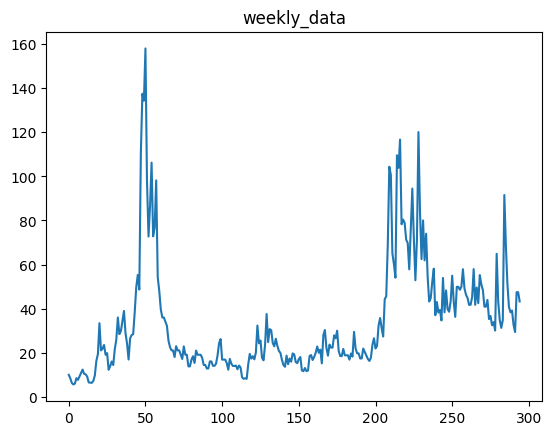

In [7]:
plt.plot(weekly_data['relative_values'])
plt.title('weekly_data')

Text(0.5, 1.0, 'hourly_data')

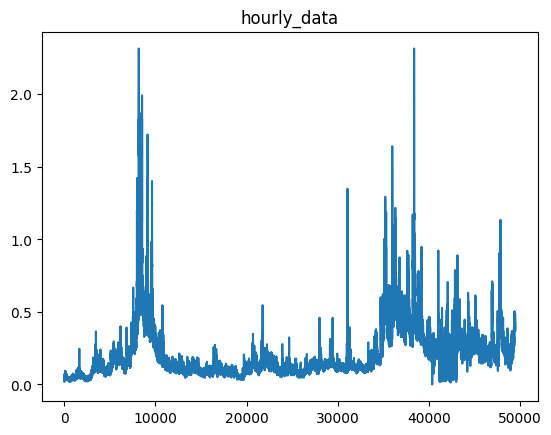

In [8]:
plt.plot(hourly_data['relative_values'])
plt.title('hourly_data')